In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets, preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.model_selection import cross_val_score, cross_validate, RepeatedKFold
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,mean_squared_error, r2_score,accuracy_score,f1_score,classification_report
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
dtree = DecisionTreeClassifier(criterion='entropy')


In [3]:
data = pd.read_csv("Downloads\dataset\diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0,33.6,0.627,50.0,1
1,1,85,66.0,29,0,26.6,0.351,31.0,0
2,8,183,64.0,0,0,23.3,0.672,32.0,1
3,1,89,66.0,23,94,28.1,0.167,21.0,0
4,0,137,40.0,35,168,43.1,2.288,33.0,1


In [4]:
data.shape

(1043, 9)

In [5]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1043 entries, 0 to 1042
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1043 non-null   int64  
 1   Glucose                   1043 non-null   int64  
 2   BloodPressure             942 non-null    float64
 3   SkinThickness             1043 non-null   int64  
 4   Insulin                   1043 non-null   int64  
 5   BMI                       1043 non-null   float64
 6   DiabetesPedigreeFunction  1043 non-null   float64
 7   Age                       917 non-null    float64
 8   Outcome                   1043 non-null   int64  
dtypes: float64(4), int64(5)
memory usage: 73.5 KB


In [7]:
data.nunique()

Pregnancies                  17
Glucose                     135
BloodPressure                47
SkinThickness                51
Insulin                     183
BMI                         246
DiabetesPedigreeFunction    507
Age                          52
Outcome                       2
dtype: int64

In [8]:
# data.Outcome.value_counts()
data['Outcome'].value_counts()

0    672
1    371
Name: Outcome, dtype: int64

In [9]:
data["Outcome"].value_counts()*100/len(data)

0    64.42953
1    35.57047
Name: Outcome, dtype: float64

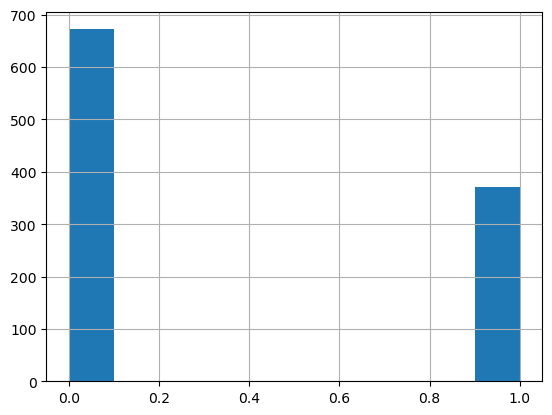

In [10]:
data['Outcome'].hist();

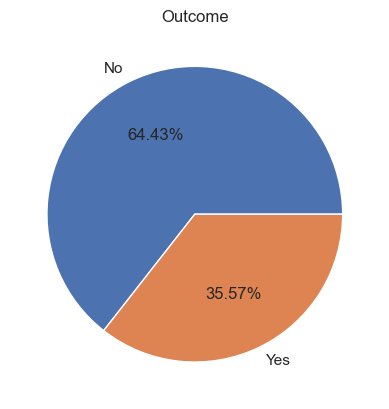

In [89]:
plt.title('Outcome')
plt.pie(data['Outcome'].value_counts(),labels=['No','Yes'], autopct='%1.2f%%')
plt.show()

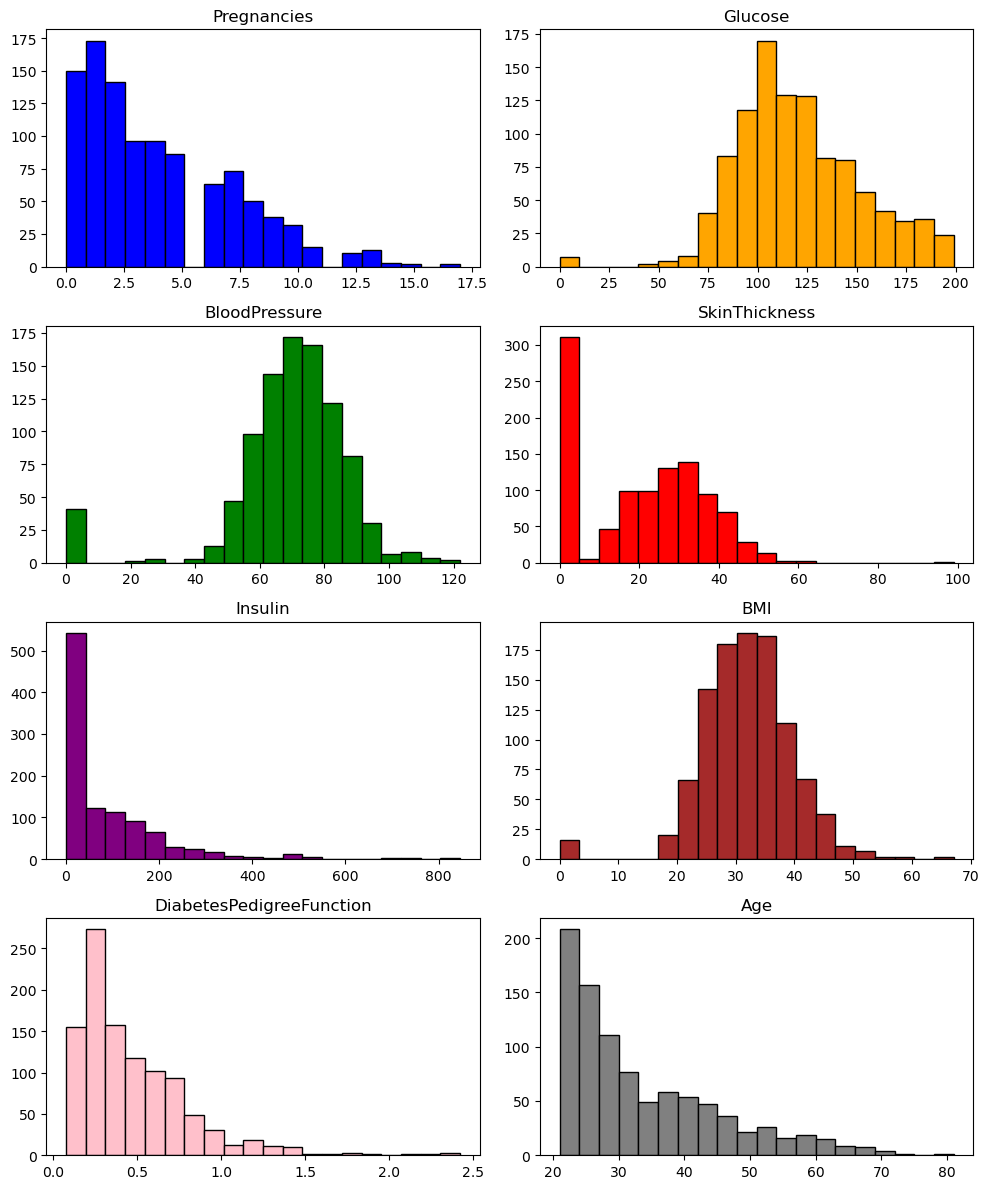

In [13]:
hist_colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
features_to_plot = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 12))


for i, feature in enumerate(features_to_plot):
    ax = axes.flatten()[i]
    ax.hist(data[feature], bins=20, color=hist_colors[i], edgecolor='black')
    ax.set_title(feature)


plt.tight_layout()
plt.show()

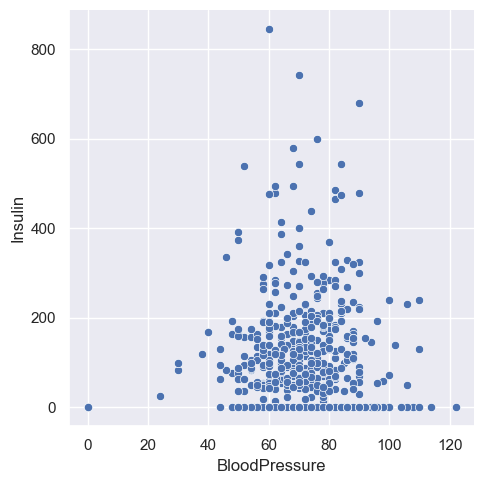

In [14]:
sns.set()
sns.relplot(x="BloodPressure", y="Insulin", data = data)

In [15]:
diabetes_cleaned = data[data['Insulin'] != 0]
diabetes_cleaned

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66.0,23,94,28.1,0.167,21.0,0
4,0,137,40.0,35,168,43.1,2.288,33.0,1
6,3,78,50.0,32,88,31.0,0.248,26.0,1
8,2,197,70.0,45,543,30.5,0.158,53.0,1
13,1,189,60.0,23,846,30.1,0.398,59.0,1
...,...,...,...,...,...,...,...,...,...
1037,1,128,48.0,45,194,40.5,0.613,24.0,1
1039,6,151,62.0,31,120,35.5,0.692,28.0,0
1040,2,146,70.0,38,360,28.0,0.337,29.0,1
1041,0,126,84.0,29,215,30.7,0.520,24.0,0


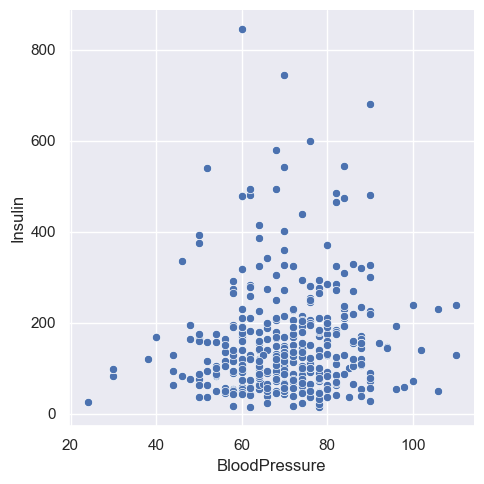

In [17]:
sns.relplot(x="BloodPressure", y="Insulin", data = diabetes_cleaned)

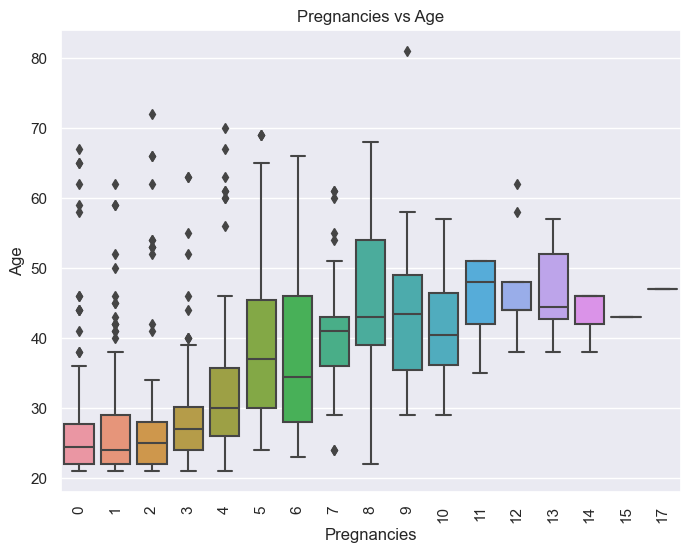

In [18]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'Pregnancies', y = 'Age',  data = data,ax=ax)
plt.title('Pregnancies vs Age')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

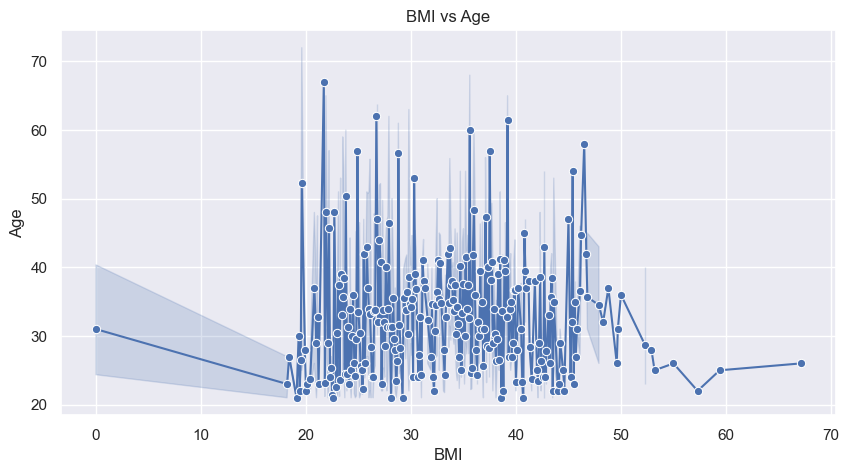

In [19]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=data,x="BMI",y="Age", marker="o")
plt.title("BMI vs Age")
plt.xlabel("BMI")
plt.ylabel("Age")
plt.show()

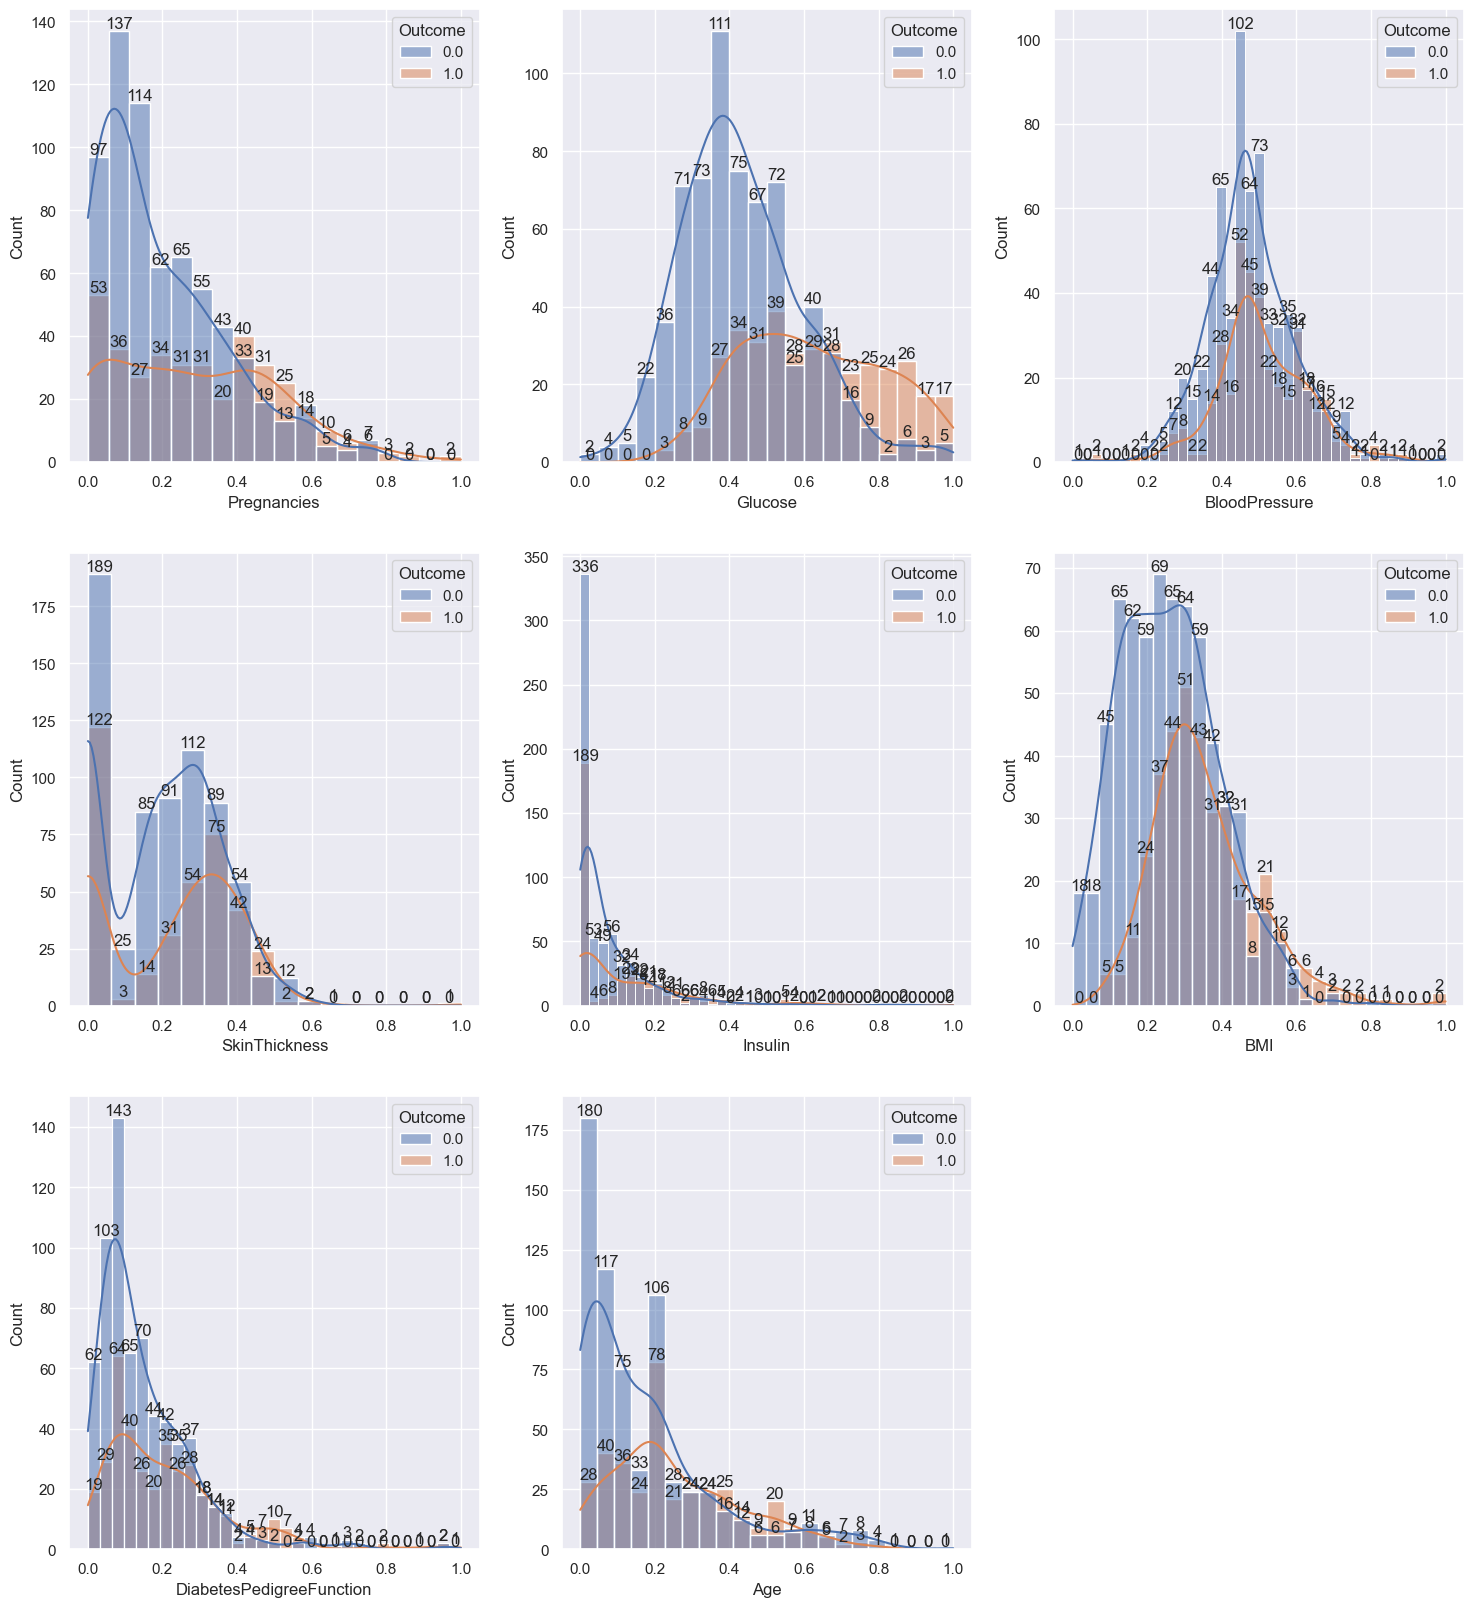

In [116]:
pno = 1
plt.figure(figsize=(18,20))
for i in data.columns:
        if pno<9:
            plt.subplot(3,3,pno)
            ax = sns.histplot(data = data , x = i , hue = data.Outcome , kde = True);
            plt.xlabel(i)
            pno+=1
            for i in ax.containers:     #to set a label on top of the bars.
                ax.bar_label(i,)

In [90]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [21]:
# preprocessing #

In [22]:
most_frequent_Age = data['Age'].mode()[0]
#data['Age'].fillna(most_frequent_value, inplace=True)
#data['Age'].replace([np.nan],most_frequent_Age, inplace = True)
data['Age'].replace([np.nan],data['Age'].mean(), inplace = True)
data['BloodPressure'].replace([np.nan],data['BloodPressure'].mean(), inplace = True)


In [23]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [25]:
(data[data.columns] == 0).sum()

Pregnancies                 150
Glucose                       7
BloodPressure                41
SkinThickness               311
Insulin                     511
BMI                          16
DiabetesPedigreeFunction      0
Age                           0
Outcome                     672
dtype: int64

In [26]:
for i in ["Glucose","BMI","Insulin","BloodPressure"]:
    data[i].replace({0:data[i].median()},inplace = True)

In [27]:
(data[data.columns] == 0).sum()

Pregnancies                 150
Glucose                       0
BloodPressure                 0
SkinThickness               311
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     672
dtype: int64

In [28]:
scaler = MinMaxScaler()
# transform data
data = pd.DataFrame(scaler.fit_transform(data), index=data.index, columns=data.columns)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.353535,0.013221,0.314928,0.234415,0.483333,1.0
1,0.058824,0.264516,0.428571,0.292929,0.013221,0.171779,0.116567,0.166667,0.0
2,0.470588,0.896774,0.408163,0.000000,0.013221,0.104294,0.253629,0.183333,1.0
3,0.058824,0.290323,0.428571,0.232323,0.096154,0.202454,0.038002,0.000000,0.0
4,0.000000,0.600000,0.163265,0.353535,0.185096,0.509202,0.943638,0.200000,1.0
...,...,...,...,...,...,...,...,...,...
1038,0.000000,0.754839,0.265306,0.000000,0.013221,0.075665,0.075149,0.733333,0.0
1039,0.352941,0.690323,0.387755,0.313131,0.127404,0.353783,0.262169,0.116667,0.0
1040,0.117647,0.658065,0.469388,0.383838,0.415865,0.200409,0.110589,0.133333,1.0
1041,0.000000,0.529032,0.612245,0.292929,0.241587,0.255624,0.188728,0.050000,0.0


In [92]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,1043.0,0.229429,0.198049,0.0,0.058824,0.176471,0.352941,1.0
Glucose,1043.0,0.500170,0.196176,0.0,0.361290,0.464516,0.625806,1.0
BloodPressure,1043.0,0.487858,0.120154,0.0,0.418367,0.469388,0.551020,1.0
SkinThickness,1043.0,0.206146,0.160727,0.0,0.000000,0.232323,0.323232,1.0
Insulin,1043.0,0.094892,0.133687,0.0,0.013221,0.013221,0.138221,1.0
BMI,1043.0,0.292206,0.142017,0.0,0.192229,0.282209,0.376278,1.0
DiabetesPedigreeFunction,1043.0,0.169698,0.142523,0.0,0.072161,0.128096,0.238685,1.0
Age,1043.0,0.202036,0.183443,0.0,0.050000,0.166667,0.283333,1.0
Outcome,1043.0,0.355705,0.478956,0.0,0.000000,0.000000,1.000000,1.0


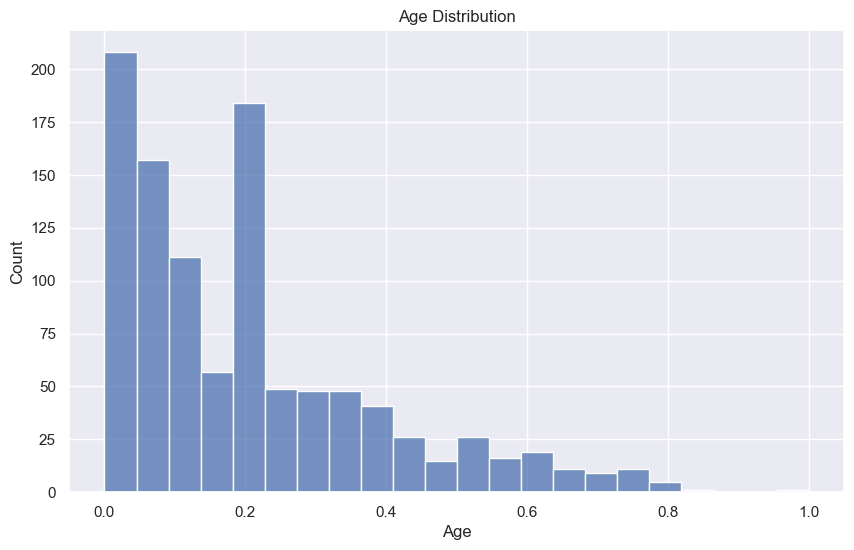

In [97]:
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(data['Age'],kde=False,ax=ax)
plt.title('Age Distribution')


[0.25608296 0.16571702 0.1298306  0.12619598 0.09475015 0.08378658
 0.1436367 ]


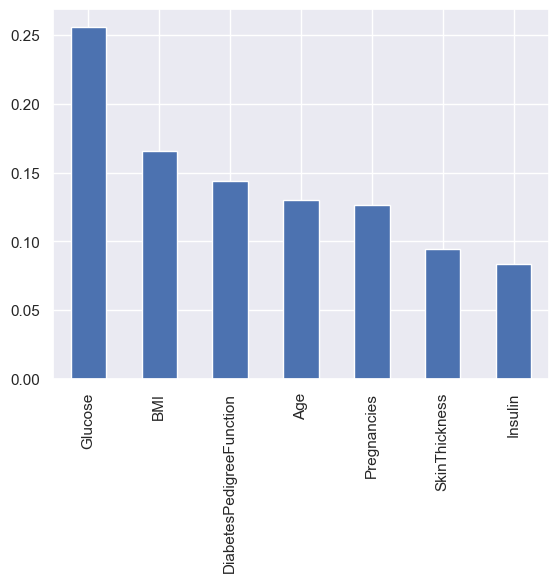

In [118]:
#order of importance
x=data[['Glucose', 'BMI', 'Age', 'Pregnancies', 'SkinThickness',
       'Insulin', 'DiabetesPedigreeFunction']]
y=data.iloc[:,8]

model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) 
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='bar')
plt.show()

In [39]:
# Split dataset into training set and test set
X = data.iloc[:,:8]
y=data.iloc[:,-1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # 70% training and 30% test

In [ ]:
## Decision Tree classifer ##

In [42]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

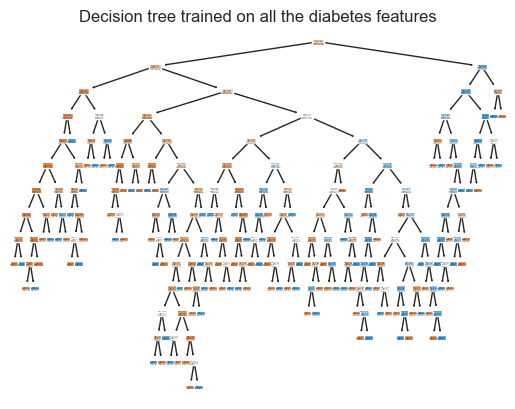

In [43]:
plt.figure()
plot_tree(clf, filled=True)
plt.title("Decision tree trained on all the diabetes features")
plt.show()

In [44]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_pred, y_test, average="weighted"))

Accuracy: 0.7571884984025559
F1 Score: 0.7540763704139216


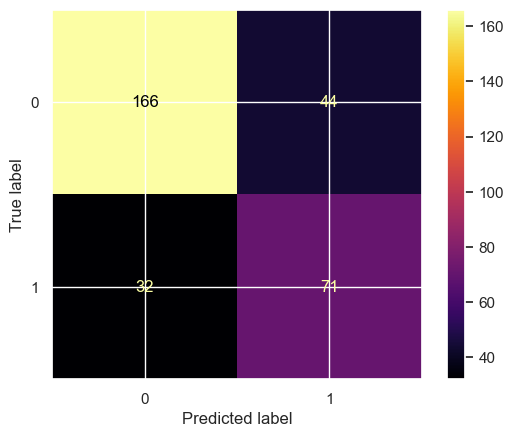

In [45]:
df_true = y_test
df_pred = y_pred
cm = confusion_matrix(df_true,df_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="inferno")

In [46]:
## report ##
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[166  44]
 [ 32  71]]
              precision    recall  f1-score   support

         0.0       0.84      0.79      0.81       210
         1.0       0.62      0.69      0.65       103

    accuracy                           0.76       313
   macro avg       0.73      0.74      0.73       313
weighted avg       0.77      0.76      0.76       313



In [197]:
### naive-bayes ##

In [52]:
# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model = model.fit(X_train, y_train)

# Predict Output
y_predicted = model.predict(X_test)


C:\Users\zead shalaby\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [53]:
accuray = accuracy_score(y_predicted, y_test)
f1 = f1_score(y_predicted, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.7380191693290735
F1 Score: 0.738682581431646


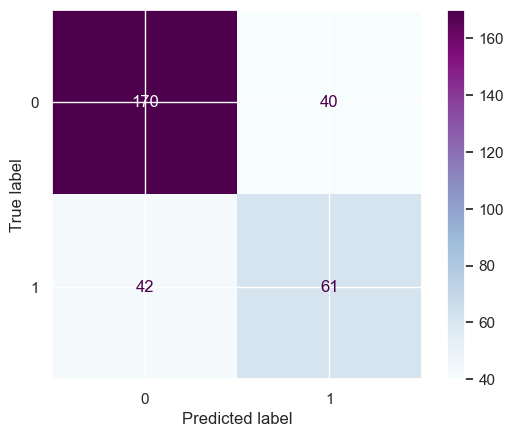

In [54]:
df_true = y_test
df_pred = y_predicted
cm = confusion_matrix(df_true,df_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="BuPu")

In [56]:
## report ##
print(confusion_matrix(y_test,y_predicted))
print(classification_report(y_test,y_predicted))

[[170  40]
 [ 42  61]]
              precision    recall  f1-score   support

         0.0       0.80      0.81      0.81       210
         1.0       0.60      0.59      0.60       103

    accuracy                           0.74       313
   macro avg       0.70      0.70      0.70       313
weighted avg       0.74      0.74      0.74       313



In [57]:
#### KNeighborsClassifier ####

In [58]:
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

C:\Users\zead shalaby\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\zead shalaby\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [59]:
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.7763578274760383
F1 Score: 0.7753031047759481


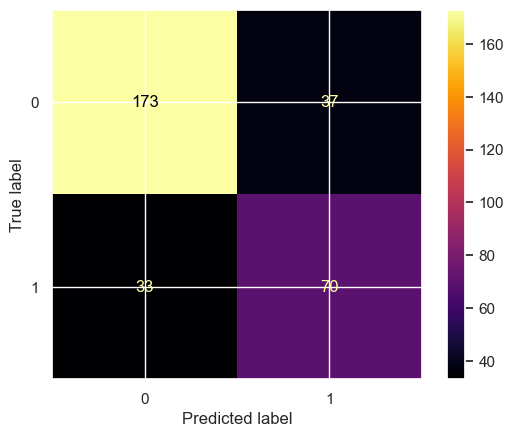

In [60]:
df_true = y_test
df_pred = y_pred
cm = confusion_matrix(df_true,df_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="inferno")

In [61]:
## report ##
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[173  37]
 [ 33  70]]
              precision    recall  f1-score   support

         0.0       0.84      0.82      0.83       210
         1.0       0.65      0.68      0.67       103

    accuracy                           0.78       313
   macro avg       0.75      0.75      0.75       313
weighted avg       0.78      0.78      0.78       313



In [207]:
#### MLPClassifier ####

In [62]:
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2))
mlp = mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

C:\Users\zead shalaby\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [63]:
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.670926517571885
F1 Score: 0.8030592734225622


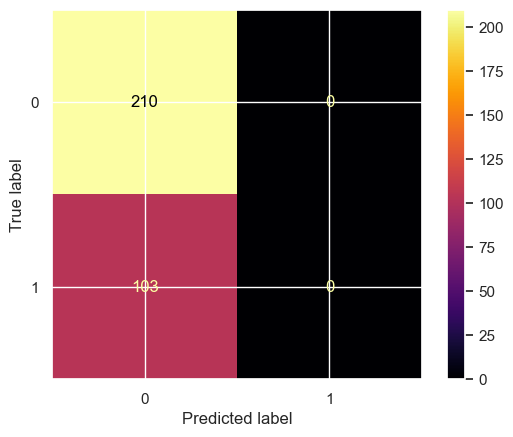

In [64]:
df_true = y_test
df_pred = y_pred
cm = confusion_matrix(df_true,df_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="inferno")

In [65]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[210   0]
 [103   0]]
              precision    recall  f1-score   support

         0.0       0.67      1.00      0.80       210
         1.0       0.00      0.00      0.00       103

    accuracy                           0.67       313
   macro avg       0.34      0.50      0.40       313
weighted avg       0.45      0.67      0.54       313



C:\Users\zead shalaby\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\zead shalaby\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\zead shalaby\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
#### LogisticRegression ####

In [67]:
Log = LogisticRegression(solver='lbfgs')
Log = Log.fit(X_train, y_train)
y_pred = Log.predict(X_test)

C:\Users\zead shalaby\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [68]:
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.7539936102236422
F1 Score: 0.7651174415786827


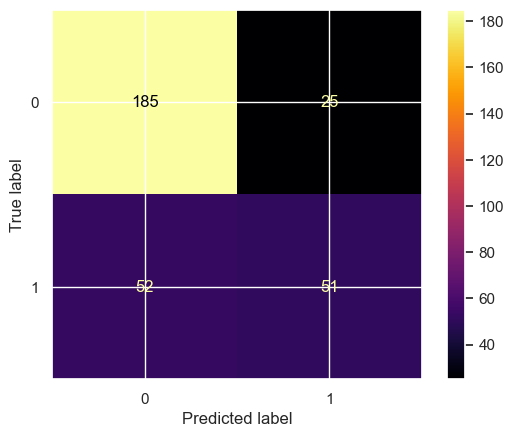

In [69]:
df_true = y_test
df_pred = y_pred
cm = confusion_matrix(df_true,df_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="inferno")

In [71]:
## report ##
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[185  25]
 [ 52  51]]
              precision    recall  f1-score   support

         0.0       0.78      0.88      0.83       210
         1.0       0.67      0.50      0.57       103

    accuracy                           0.75       313
   macro avg       0.73      0.69      0.70       313
weighted avg       0.74      0.75      0.74       313



In [50]:
#### Ensemble ####

In [72]:
X = data.iloc[:,:8]
y = data.iloc[:,-1:]

In [114]:
# A helper function that will run RepeatedKFold cross validation for a range 
# of ensemble sizes (est_range).
# Takes, the estimator, n_reps and the range as arguments. 
def eval_bag_est_range(the_est, n_reps, est_range, folds = 10):
    n_est_dict = {}
    for n_est in est_range: 
        the_bag = BaggingClassifier(the_est, 
                            n_estimators = n_est,
                            max_samples = 1.0, # bootstrap resampling 
                            bootstrap = True)
        bag_cv = cross_validate(the_bag, X,y, n_jobs=-1,
                                cv=RepeatedKFold(n_splits=folds, n_repeats=n_reps)) 
        n_est_dict[n_est]=bag_cv['test_score'].mean()
    return n_est_dict

In [74]:
kNNpipe  = Pipeline(steps=[ ('classifier', KNeighborsClassifier(n_neighbors=1))])

NNPipe = Pipeline(steps=[  ('classifier', MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2)))])

DecTreepipe  = Pipeline(steps=[ ('classifier', DecisionTreeClassifier())])

Gauspipe  = Pipeline(steps=[ ('classifier', GaussianNB())])

logpipe  = Pipeline(steps=[ ('classifier', LogisticRegression(solver='lbfgs'))])


In [75]:
res_NN_bag = eval_bag_est_range(NNPipe, 10, range(2,16))

In [76]:
res_NN_bag

{2: 0.7396053113553112,
 3: 0.7523498168498167,
 4: 0.7514725274725274,
 5: 0.7600375457875458,
 6: 0.7635357142857144,
 7: 0.7634624542124542,
 8: 0.7666135531135532,
 9: 0.7697902930402932,
 10: 0.7683589743589743,
 11: 0.7673260073260074,
 12: 0.7689221611721614,
 13: 0.7701016483516484,
 14: 0.7720430402930403,
 15: 0.7687536630036631}

In [77]:
res_kNN_bag  = eval_bag_est_range(kNNpipe, 10, range(2,16))

In [78]:
res_kNN_bag

{2: 0.7690521978021978,
 3: 0.782099816849817,
 4: 0.7843626373626372,
 5: 0.7972060439560437,
 6: 0.7935576923076922,
 7: 0.7979880952380952,
 8: 0.7973095238095239,
 9: 0.8046300366300366,
 10: 0.8039139194139195,
 11: 0.8033443223443225,
 12: 0.8075641025641027,
 13: 0.8058589743589744,
 14: 0.8094157509157509,
 15: 0.8107362637362638}

In [79]:
res_DecTreepipe  = eval_bag_est_range(DecTreepipe, 10, range(2,16))

In [80]:
res_DecTreepipe

{2: 0.7824752747252747,
 3: 0.8103653846153847,
 4: 0.8150677655677654,
 5: 0.8318470695970694,
 6: 0.8312692307692308,
 7: 0.8358507326007327,
 8: 0.8432445054945055,
 9: 0.8422829670329672,
 10: 0.8506923076923079,
 11: 0.8487161172161173,
 12: 0.8486336996336996,
 13: 0.8535934065934064,
 14: 0.8531382783882785,
 15: 0.8574285714285714}

In [81]:
res_Gauspipe  = eval_bag_est_range(Gauspipe, 10, range(2,16))

In [82]:
res_Gauspipe

{2: 0.7479313186813188,
 3: 0.7468058608058605,
 4: 0.7461126373626373,
 5: 0.7478534798534797,
 6: 0.744414835164835,
 7: 0.7439899267399268,
 8: 0.7472673992673994,
 9: 0.7467152014652015,
 10: 0.7464468864468863,
 11: 0.7453653846153846,
 12: 0.7454716117216117,
 13: 0.7474734432234432,
 14: 0.745614468864469,
 15: 0.7476043956043956}

In [83]:
res_logpipe  = eval_bag_est_range(logpipe, 10, range(2,16))

In [84]:
res_logpipe

{2: 0.7596639194139194,
 3: 0.7601089743589745,
 4: 0.7611675824175825,
 5: 0.759554945054945,
 6: 0.7606904761904759,
 7: 0.7626025641025643,
 8: 0.7615805860805861,
 9: 0.7606364468864468,
 10: 0.7609615384615386,
 11: 0.7610613553113555,
 12: 0.7608836996336997,
 13: 0.760504578754579,
 14: 0.7607893772893773,
 15: 0.7611446886446886}

In [85]:
#### 

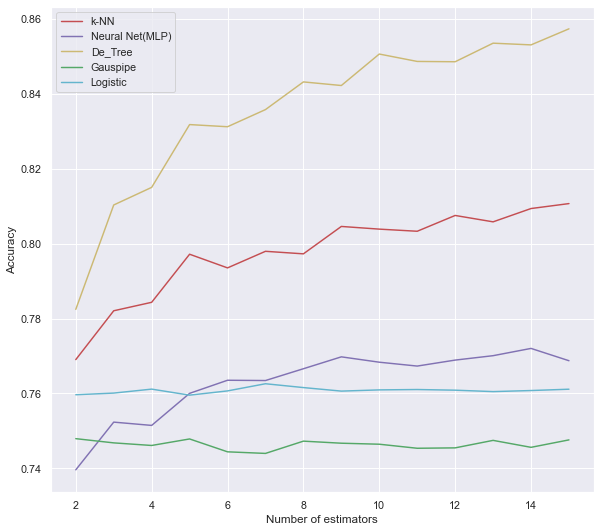

In [86]:
kNN_list = sorted(res_kNN_bag.items()) # sorted by key, return a list of tuples
#nc, kNN_accs = zip(*kNN_list) # unpack a list of pairs into two tuples
NN_list = sorted(res_NN_bag.items()) # sorted by key, return a list of tuples
#nc, NN_accs = zip(*NN_list) # unpack a list of pairs into two tuples
tree_list = sorted(res_DecTreepipe.items()) # sorted by key, return a list of tuples
Gaus_list = sorted(res_Gauspipe.items()) # sorted by key, return a list of tuples
log_list = sorted(res_logpipe.items()) # sorted by key, return a list of tuples

##  dataframe  ##
knn_p = pd.DataFrame(kNN_list) 
NN_p = pd.DataFrame(NN_list) 
tree_p = pd.DataFrame(tree_list) 
Gaus_p = pd.DataFrame(Gaus_list) 
log_p = pd.DataFrame(log_list) 


fig = plt.figure(figsize=(10, 9), dpi=70)

ax1 = fig.add_subplot(1, 1, 1)

## k-NN ##
x = knn_p.iloc[:,:1].values 
y = knn_p.iloc[:,-1:].values 

## Neural Net (mlp)) ##
c = NN_p.iloc[:,:1].values 
b = NN_p.iloc[:,-1:].values 

## De_Tree ##
d = tree_p.iloc[:,:1].values 
e = tree_p.iloc[:,-1:].values 


## Gauspipe ##
f = Gaus_p.iloc[:,:1].values 
g = Gaus_p.iloc[:,-1:].values 


## Logistic ##
h = log_p.iloc[:,:1].values 
i = log_p.iloc[:,-1:].values 


plt.plot(x, y, c='r',label = 'k-NN')
plt.plot(c, b, c='m',label = 'Neural Net(MLP)')
plt.plot(d, e, c='y',label = 'De_Tree')
plt.plot(f, g, c='g',label = 'Gauspipe')
plt.plot(h, i, c='c',label = 'Logistic')

plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")

plt.legend(loc = 'upper left')
